In [1]:
# import necessary modules
import numpy as np
import pandas as pd
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.animation as animation
from scipy import stats
from scipy.special import erfc
from scipy.signal import gaussian
from scipy.ndimage import convolve1d
from sklearn.linear_model import LogisticRegression as logreg
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
from tqdm import tqdm as tqdm
import random
from random import shuffle
import pickle
import copy
from src.codonTable import codonTable
from src.codonUtils import utils
from src.thunderflask import thunderflask
from src.bacteria import strain
from src.codonOptimizer import tableOptimizer
import itertools

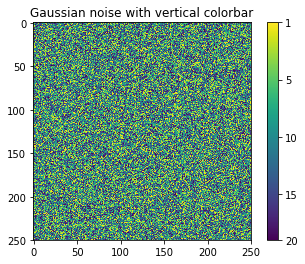

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from numpy.random import rand

fig, ax = plt.subplots()

data = np.clip(rand(250, 250)*19 + 1, 1, 20)

cax = ax.imshow(data, interpolation='nearest', cmap=cm.viridis)
ax.set_title('Gaussian noise with vertical colorbar')

# Add colorbar, make sure to specify tick locations to match desired ticklabels
labels = ['1', '5', '10', '15', '20']
labels.reverse()
cbar = fig.colorbar(cax, ticks=[1, 5, 10, 15, 20])
cbar.ax.set_yticklabels(labels)  # vertically oriented colorbar
plt.savefig('colorbarnum.svg')

In [19]:
labels.reverse()

In [20]:
labels

['1', '5', '10', '15', '20']

In [19]:
fsquad = dict()
for (n1,n2,n3,n4) in itertools.product(utils.rNTPs, repeat=4):
    fsquad[n1+n2+n3+n4] = '0'

# populate elements by hand
fsquad['UUUU'] = 'F'
fsquad['UGGU'] = 'P'
fsquad['CCAU'] = 'A'
fsquad['AAUU'] = 'L'
fsquad['GGAU'] = 'H'
fsquad['UCAC'] = 'K'
fsquad['CAUC'] = 'W'
fsquad['AGAC'] = 'M'
fsquad['GUUC'] = 'S'
fsquad['GGGC'] = 'C'
fsquad['UAUA'] = 'Y'
fsquad['CGAA'] = 'T'
fsquad['AUUA'] = 'Q'
fsquad['GUCA'] = 'G'
fsquad['GCAA'] = 'R'
fsquad['UUGG'] = 'V'
fsquad['CUUG'] = 'D'
fsquad['UGAG'] = 'I'
fsquad['ACAG'] = 'E'
fsquad['GAUG'] = 'N'
fsquad['UAAU'] = '*'
codonTable(table=fsquad).codonTable.to_csv('~/fsquad.csv')

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


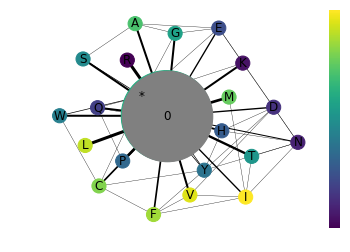

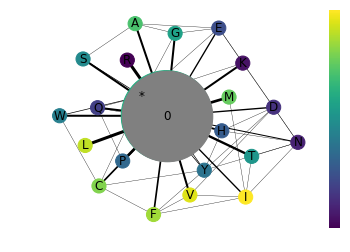

In [4]:
red20 = codonTable(table='RED20')
sc = codonTable()

STOP = set(codon for codon, aa in sc.codonDict.items() if aa == '*')
NULL = set(codon for codon, aa in red20.codonDict.items() if aa == '*') - STOP

red20_table = copy.deepcopy(red20.codonDict)
for codon in NULL:
    red20_table[codon] = '0'
    
codonTable(table=red20_table).plotGraph()

In [25]:
with open('/Users/jonathancalles/Dropbox/Lab/ATD/codon-tables/data/manuscript_testy/N=1e6_b=1_l=2/RED20_1/params/2019-06-25_RED20_1_1_params.pickle', 'rb') as handle:
    param = pickle.load(handle)
    
param

{'sim_num': 1,
 'batch_num': 1,
 'strains': [<src.bacteria.strain at 0x1c2210a9b0>],
 'N_pop': 1000000.0,
 'T_0': 0,
 'T_sim': 1000,
 'dt': 0.1,
 't_extra': 5,
 'N_sims': 1,
 'mut_param': [1, 2],
 'date': '2019-06-25',
 'code': 'RED20',
 'filepath': 'RED20_1/'}

In [26]:
bact = param['strains'][0]
bact

In [27]:
bact.table.codonTable

U        C        A        G
U U  UUU : *  UCU : *  UAU : *  UGU : *
  C  UUC : F  UCC : *  UAC : Y  UGC : C
  A  UUA : *  UCA : S  UAA : *  UGA : *
  G  UUG : *  UCG : *  UAG : *  UGG : W
C U  CUU : *  CCU : *  CAU : *  CGU : R
  C  CUC : *  CCC : *  CAC : H  CGC : *
  A  CUA : L  CCA : *  CAA : *  CGA : *
  G  CUG : *  CCG : P  CAG : Q  CGG : *
A U  AUU : *  ACU : *  AAU : *  AGU : *
  C  AUC : I  ACC : T  AAC : N  AGC : *
  A  AUA : *  ACA : *  AAA : K  AGA : *
  G  AUG : M  ACG : *  AAG : *  AGG : *
G U  GUU : *  GCU : *  GAU : *  GGU : *
  C  GUC : V  GCC : *  GAC : D  GGC : *
  A  GUA : *  GCA : A  GAA : E  GGA : G
  G  GUG : *  GCG : *  GAG : *  GGG : *

In [21]:
SC = codonTable()
table = SC.codonTable
table

U        C        A        G
U U  UUU : F  UCU : S  UAU : Y  UGU : C
  C  UUC : F  UCC : S  UAC : Y  UGC : C
  A  UUA : L  UCA : S  UAA : *  UGA : *
  G  UUG : L  UCG : S  UAG : *  UGG : W
C U  CUU : L  CCU : P  CAU : H  CGU : R
  C  CUC : L  CCC : P  CAC : H  CGC : R
  A  CUA : L  CCA : P  CAA : Q  CGA : R
  G  CUG : L  CCG : P  CAG : Q  CGG : R
A U  AUU : I  ACU : T  AAU : N  AGU : S
  C  AUC : I  ACC : T  AAC : N  AGC : S
  A  AUA : I  ACA : T  AAA : K  AGA : R
  G  AUG : M  ACG : T  AAG : K  AGG : R
G U  GUU : V  GCU : A  GAU : D  GGU : G
  C  GUC : V  GCC : A  GAC : D  GGC : G
  A  GUA : V  GCA : A  GAA : E  GGA : G
  G  GUG : V  GCG : A  GAG : E  GGG : G

In [ ]:
path = '/home/jonathan/Lab/ATD/codon-tables/data/local_test/N=1e6_b=1_l=2/SC_vs_FF20_0/output/'
with open(path+'2018-04-03_SC_vs_FF20_sim=0_batch=0_favg_traces_N_pop=1e6=T=1000_N=3_b=1_l=2.pickle', 'rb') as handle:
    df = pickle.load(handle)

In [ ]:
sns.tsplot(data=df, time='time', value='popfrac', unit='sim', condition='code', ci='sd')
plt.xlabel('Time (in generations)')
plt.ylabel('Population Fraction')
plt.xlim([0,200])
plt.legend()
plt.savefig('test_competition.png')
plt.show()

In [ ]:
# unpack some dataframes

DF = pd.DataFrame()
filenames = [
#     '/home/jonathan/Lab/ATD/codon-tables/data/competition_test/N=1e6_b=1_l=2/SC_vs_FF16_0/output/2018-04-04_SC_vs_FF16_0_concatenated.pickle', #vs ff16
    '/home/jonathan/Lab/ATD/codon-tables/data/competition_test/N=1e6_b=1_l=2/SC_vs_FF20_0/output/2018-04-04_SC_vs_FF20_0_concatenated.pickle', # vs ff20
    '/home/jonathan/Lab/ATD/codon-tables/data/competition_test/N=1e6_b=1_l=2/SC_vs_Colorado_0/output/2018-04-04_SC_vs_Colorado_0_concatenated.pickle', # vs colorado
    '/home/jonathan/Lab/ATD/codon-tables/data/competition_test/N=1e6_b=1_l=2/SC_vs_RED20_0/output/2018-04-04_SC_vs_RED20_0_concatenated.pickle', # vs red20
    '/home/jonathan/Lab/ATD/codon-tables/data/competition_test/N=1e6_b=1_l=2/SC_vs_PROMISC20_0/output/2018-04-04_SC_vs_PROMISC20_0_concatenated.pickle'
]
# get dataframes
for file in tqdm(filenames, desc='Parsing Dataframes: '):
    with open(file, 'rb') as handle:
        df = pickle.load(handle)
        df = df.loc[(df['sim'] < 10) & (df['code'] != 'Standard Code')]
        DF = pd.concat([DF, df], copy=False)
# with open(filenames[0], 'rb') as handle:
#     df = pickle.load(handle)

In [ ]:
colordict = {
#     'Standard Code' : 'blue',
    'Colorado' : 'red',
    'FF20' : 'green',
    'RED20' : 'purple',
    'PROMISC20' : 'orange'
}
def tracer(code):
    df = DF.loc[DF['code'] == code]
    sims = set(df['sim'])
    for sim in sims:
        lildf = df.loc[df['sim'] == sim]
        t = lildf['time']
        x = lildf['popfrac']
        label = code if sim == 0 else ''
        plt.plot(t, x, color=colordict[code], alpha=0.5, label=label)
tracer('FF20')
plt.xlim([0,400])
plt.title('FF20 Population Fraction vs Time in Head-to-Head 1:1 Competition with Standard Code (10 Replicates)')
plt.xlabel('Time (in generations)')
plt.ylabel('Population Fraction')
plt.legend()
plt.savefig('test_competition_3.png')
plt.show()

In [ ]:
for code in colordict.keys():
    tracer(code)
plt.xlim([0,400])
plt.title('Population Fraction vs Time in Head-to-Head 1:1 Competition with Standard Code (10 Replicates)')
plt.xlabel('Time (in generations)')
plt.ylabel('Population Fraction')
plt.legend()
plt.show()

In [ ]:
ax1 = sns.tsplot(
    data=DF,
    time='time',
    value='popfrac',
    unit='sim',
    condition='code',
    color=colordict,
    #ci='sd'
)
# format plot
sns.despine()
# plt.xlim([0, 1000])
# plt.ylim([0, 1.3])
plt.legend()
plt.title('Population Fraction vs Time in Head-to-Head 1:1 Competition with Standard Code (10 Replicates)')
plt.xlabel('Time (in generations)')
plt.ylabel('Population Fraction')
plt.savefig('test_competition_2.png')
plt.show()

In [ ]:
# lets make one contour line
t = df.loc[df['sim'] == 0]['time']
contain_probability = np.zeros(len(t))
num_sims = len(df.loc[df])
for ind in tqdm(range(len(contain_probability)), desc='Processing sims: '):
    lildf = df.loc[ind]
    contain_probability[ind] = sum(lildf['popfrac'] == 0) / num_sims
plt.plot(t, contain_probability)

In [ ]:
# lets contour
with open('/home/jonathan/Lab/ATD/codon-tables/data/contour_test/N=1e6_b=1_l=2/SC_vs_FF20_contour_3/output/2018-04-05_SC_vs_FF20_contour_3_concatenated.pickle', 'rb') as handle:
    df = pickle.load(handle)

In [ ]:
# get index of N_0 closest to 1:1
ind = np.argmin(np.abs(1 - 2*df['N_0']/(1e6)).values)
df['N_0'].iloc[ind]

In [ ]:
colordict = {
#     'Standard Code' : 'blue',
    'Colorado' : 'red',
    'FF20' : 'green',
    'RED20' : 'purple',
    'PROMISC20' : 'orange'
}
def tracer(DF, code):
    df = DF.loc[DF['code'] == code]
    sims = set(df['sim'])
    colordict = {
#     'Standard Code' : 'blue',
    'Colorado' : 'red',
    'FF20' : 'green',
    'RED20' : 'purple',
    'PROMISC20' : 'orange'
    }
    for sim in sims:
        lildf = df.loc[df['sim'] == sim]
        t = lildf['time']
        x = lildf['popfrac']
        label = code if sim == 0 else ''
        plt.plot(t, x, color=colordict[code], alpha=0.3, label=label)
# get index of N_0 closest to 1:1
ind = np.argmin(np.abs(1 - 2*df['N_0']/(1e6)).values)
n_0 = df['N_0'].iloc[ind]

DF = df.loc[df['N_0']==n_0]
tracer(DF, 'FF20')
plt.xlim([0,600])
plt.title('FF20 Population Fraction vs Time in Head-to-Head 1:1 Competition with Standard Code (10 Replicates)')
plt.xlabel('Time (in generations)')
plt.ylabel('Population Fraction')
plt.legend()
plt.savefig('test_competition_3.png')
plt.show()

In [ ]:
DF.index

In [ ]:
T_sim = 1000
dt = 0.1
newtimes = np.linspace(0, T_sim, int((T_sim)/dt)+1)

In [ ]:
X, Y = np.meshgrid(t, N_0)
CS = plt.contourf(X, Y, contain_probability, cmap=plt.cm.Greens, vmin=0, vmax=1)
#plt.clabel(CS, inline=1, fontsize=10)
ax = plt.gca()
plt.xlim([0,400])
plt.ylim([6e3, 1e6])
# ax.set_xscale("log")
ax.set_yscale("log")

cbar = plt.colorbar(CS, ticks=[0, 0.25, 0.5, 0.75, 1])
cbar.ax.set_ylabel('Containment Probability')
plt.clim(0,1)
# Add the contour line levels to the colorbar
plt.title('FF20 Containment Probability')
plt.xlabel('Time (in generations)')
plt.ylabel('Initial Population Size')
plt.savefig('contour_log_inset.svg')
plt.show()

In [ ]:
# code optimization video
sim = tableOptimizer()
optimizedTable, Ws, Es = sim.GDA()

# set plot characteristics
labelsize=20
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=labelsize)
plt.rc('ytick', labelsize=labelsize)
plt.rc('axes', labelsize=labelsize)

# set video characteristics
fps = 30
vid_length = 5 # in sec
tot_frames = fps*vid_length

def framer(nFrame):
    plt.cla()
    # adjust frame number to index
    ind = int(nFrame * (len(Es) / tot_frames))
    # plot energy up to that point
    plt.plot(-Es[:ind], '-k')
    plt.xlim([0, len(Es)])
    plt.ylim([min(-Es), max(-Es)])
#     ax.yaxis.grid(False)
    sns.despine()
    ax = plt.gca()
    plt.tick_params(
        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        left=False,
        labelbottom=False,
        labelleft=False
    )
    plt.xlabel('Iteration')
    plt.ylabel('Energy')
    plt.title('Optimizing Code...', fontsize=labelsize)

framer(0)
fig = plt.gcf()
anim = animation.FuncAnimation(fig, framer, frames=tot_frames)
anim.save('test.gif', writer='imagemagick', fps=fps, dpi=300);

In [13]:
filenames = [
#     '/Users/jonathancalles/Dropbox/Lab/ATD/codon-tables/data/manuscript/N=1e6_b=1_l=2/lin_contour_data/2018-05-01_SC_vs_FF16_lin_contour_1_concatenated.pickle',
#     '/Users/jonathancalles/Dropbox/Lab/ATD/codon-tables/data/manuscript/N=1e6_b=1_l=2/lin_contour_data/2018-05-01_SC_vs_FF20_lin_contour_1_concatenated.pickle',
#     '/Users/jonathancalles/Dropbox/Lab/ATD/codon-tables/data/manuscript/N=1e6_b=1_l=2/lin_contour_data/2018-05-01_SC_vs_RED15_lin_contour_0_concatenated.pickle',
#     '/Users/jonathancalles/Dropbox/Lab/ATD/codon-tables/data/manuscript/N=1e6_b=1_l=2/lin_contour_data/2018-05-01_SC_vs_SC_lin_contour_1_concatenated.pickle',
#     '/Users/jonathancalles/Dropbox/Lab/ATD/codon-tables/data/manuscript/N=1e6_b=1_l=2/lin_contour_data/2018-05-03_SC_vs_FFQUAD_lin_contour_1_concatenated.pickle',
    '/Users/jonathancalles/Dropbox/Lab/ATD/codon-tables/data/manuscript/N=1e6_b=1_l=2/lin_contour_data/2018-05-01_SC_vs_PROMISC15_lin_contour_0_concatenated.pickle',
#     '/Users/jonathancalles/Dropbox/Lab/ATD/codon-tables/data/manuscript/N=1e6_b=1_l=2/lin_contour_data/2019-06-28_SC_vs_PROMISC20_lin_contour_2_concatenated_trim.pickle',
#     '/Users/jonathancalles/Dropbox/Lab/ATD/codon-tables/data/manuscript/N=1e6_b=1_l=2/lin_contour_data/2019-06-28_SC_vs_RED20_lin_contour_4_concatenated_trim.pickle'   
]
dfs = []
for file in filenames:
    with open(file, 'rb') as handle:
        dfs.append(pickle.load(handle))
DF = pd.concat(dfs, copy=False)
DF

,N_0,code,popfrac,sim,time
0,0.0,PROMISC15,0.0,0,0.0
1,0.0,PROMISC15,0.0,0,1.0
2,0.0,PROMISC15,0.0,0,2.0
3,0.0,PROMISC15,0.0,0,3.0
4,0.0,PROMISC15,0.0,0,4.0
5,0.0,PROMISC15,0.0,0,5.0
6,0.0,PROMISC15,0.0,0,6.0
7,0.0,PROMISC15,0.0,0,7.0
8,0.0,PROMISC15,0.0,0,8.0
9,0.0,PROMISC15,0.0,0,9.0


In [14]:
# perform analysis and store in dict
stats = {
    column:[] for column in ['code', 'Intercept', 'SE_i', 'ci_i', 't_i', 'p_i',
                             'Coef', 'SE_c', 'ci_c', 't_c', 'p_c', 'llr']
}
codes = [
    'PROMISC15'
]
for code in tqdm(codes, desc='Running Linear Regressions'):
    df = DF.loc[DF['code'] == code]
    endog = 1 - df['popfrac']
    exog = sm.add_constant(df['N_0'])
    
    logit = sm.Logit(endog, exog)
    results = logit.fit_regularized(disp=False, alpha=3)

    # populate stats dict
    stats['code'].append(code)
    stats['Intercept'].append(results.params.loc['const'])
    stats['SE_i'].append(results.bse.loc['const'])
    stats['ci_i'].append(tuple([x for x in results.conf_int().loc['const'].values]))
    stats['t_i'].append(results.tvalues.loc['const'])
    stats['p_i'].append(results.pvalues.loc['const'])
    stats['Coef'].append(results.params.loc['N_0'])
    stats['SE_c'].append(results.bse.loc['N_0'])
    stats['ci_c'].append(tuple([x for x in results.conf_int().loc['N_0'].values]))
    stats['t_c'].append(results.tvalues.loc['N_0'])
    stats['p_c'].append(results.pvalues.loc['N_0'])
    stats['llr'].append(results.llr)
data = pd.DataFrame.from_dict(stats)
data

/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


QC check did not pass for 2 out of 2 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
Could not trim params automatically due to failed QC check.  Trimming using trim_mode == 'size' will still work.



,code,Intercept,SE_i,ci_i,t_i,p_i,Coef,SE_c,ci_c,t_c,p_c,llr
0,PROMISC15,4.627615,0.001951,"(4.62379093534494, 4.631439627327826)",2371.636694,0.0,-0.000005,2.630180e-09,"(-5.2661596937365585e-06, -5.255849578522863e-06)",-2000.245273,0.0,7.139448e+06


In [ ]:
# simulation video 

# control aesthetics
labelsize=20
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=labelsize)
plt.rc('ytick', labelsize=labelsize)
plt.rc('axes', labelsize=labelsize)

# populate sim
LUCA = strain(N_pop=1e6, fitness=0, mu=2e-5)
sim = thunderflask(LUCA)
# initialize some variables
T_curr = 0
mut_param = [1, 2]
dt = 0.1
T_sim = 500

# run simulation
sim.simulate(T_sim, dt, T_curr, mut_param, save_all=True, prune_strains=True,
             show_progress=True)

In [ ]:
# set up list of strains
n = len(sim.allStrains)
colors = pl.cm.viridis(np.linspace(0,1,n))
strainlist = [(time_ind, bact) for time_ind, bact in enumerate(sim.allStrains)]

sorting_list = []
for time_ind, bact in tqdm(strainlist, desc='Looping through all strains'):
    try:
        pop_size = max(bact.poptrace)
    except:
        pop_size = 0
    sorting_list.append((pop_size, time_ind, bact))
sortedlist = sorted(sorting_list, key=lambda x: x[0])
endlist = [(pop_ind, time_ind, bact) for pop_ind, (pop_size, time_ind, bact) in enumerate(reversed(sortedlist))]
shuffle(endlist)

# set plot characteristics
labelsize=20
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=labelsize)
plt.rc('ytick', labelsize=labelsize)
plt.rc('axes', labelsize=labelsize)

width = 6
height = 1.75* width
# set video characteristics
fps = 30
vid_length = 5 # in sec
tot_frames = fps*vid_length

def framer(nFrame):
    # calculate curr_time
    curr_time = nFrame*(500/tot_frames)
    # plot pop traces
    fig, axarr = plt.subplots(2, sharex=True)
    print('Frame {0}/{1}'.format(nFrame, tot_frames))
    for pop_ind, time_ind, bact in endlist:
        if (pop_ind < 30) or (pop_ind % 20 ==0) :
            t = bact.timepoints
            pop = bact.poptrace
            stopind = next((int(ind) for ind, time in enumerate(t) if time >= curr_time), -1)
            axarr[0].semilogy(t[:stopind], pop[:stopind], color=colors[time_ind])
    axarr[0].set_yticks([])
    axarr[0].set_xticks([])
    # plot mean fitness
    t = np.array(sim.f_avgtrace['timepoints'])
    f = np.array(sim.f_avgtrace['f_avg'])
    stopind = next((int(ind) for ind, time in enumerate(t) if time >= curr_time), -1)
    axarr[1].plot(t[:stopind], f[:stopind], 'k')
    plt.xlabel('Time (gen)')
    axarr[0].set_ylabel('Pop. Frac')
    axarr[1].set_ylabel('Fitness (1/gen)')
    plt.suptitle('Simulating Population...', fontsize=labelsize)
    plt.xlim([0, 500])
    axarr[0].set_ylim([1e0, 10**(6.2)])
    axarr[1].set_ylim([0, 0.4])
    fig.set_size_inches(width, height)
    ax = plt.gca()
    sns.despine()
    plt.tick_params(
        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        left=False,
        labelbottom=False,
        labelleft=False
    )
fig = plt.gcf()
anim = animation.FuncAnimation(fig, framer, frames=tot_frames)
anim.save('test.gif', writer='imagemagick', fps=fps, dpi=300);
# framer(tot_frames)

In [ ]:
%timeit framer(tot_frames)

In [ ]:
tot_frames*2/60

In [ ]:
# plot results
strainlist = []
for bact in tqdm(sim.allStrains, desc='Looping through all strains'):
    try:
        strainlist.append((max(bact.poptrace), bact))
    except:
        strainlist.append((0, bact))
sortedlist = sorted(strainlist, key=lambda x: x[0])
endlist = [(i, bact) for i, (__, bact) in enumerate(reversed(sortedlist))]
shuffle(endlist)

n_strain = len(sortedlist)
colors = pl.cm.viridis(np.linspace(0,1, n_strain))
ind = 0
for i, bact in tqdm((endlist), desc='Plotting Lineages'):
    if (i < 30) :
        t = bact.timepoints
        pop = bact.poptrace
        plt.semilogy(t, pop, color=colors[i])
    elif (i % 20 == 0):
        t = bact.timepoints
        pop = bact.poptrace
        plt.semilogy(t, pop, color=colors[i-n_big])
            
plt.xlabel('Time (in generations)')
plt.ylabel('Population Size')
# plt.title('Standard Code: Population Traces for Established Strains')
plt.xlim([T_curr, T_sim])
plt.ylim([1e0, 10**(6.2)])
sns.despine()
plt.show()

In [2]:
sc = codonTable().codonDict
degeneracy = {}
for codon, aa in sc.items():
    if aa == '*': continue
    elif aa not in degeneracy:
        degeneracy[aa] = 1
    else:
        degeneracy[aa] +=1
        
combos = {combo for combo in itertools.combinations(degeneracy.keys(), 15)}
counts = {combo:0 for combo in combos}

In [47]:
num = 161017390599463087081974710978972632419926016000000
print('{0:g}'.format(num))

1.61017e+50


In [5]:
num = np.prod([count for count in degeneracy.values()])
print('{0:g}'.format(num))

3.39739e+08


In [4]:
num1 = 490624630038923936413777920000
num2 = 101370917007360000
print('{0:g}'.format(num1*num2))

4.97351e+46


In [3]:
for combo, count in tqdm(counts.items(), desc="working through combos"): 
    counts[combo] = np.prod([degeneracy[aa] for aa in combo])
num = np.sum([count for count in counts.values()])*3
print('{0:g}'.format(num))

working through combos: 100%|██████████| 15504/15504 [00:00<00:00, 120816.45it/s]

1.97832e+11
